## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Importance of Circularity in Optimizing Quadratic functions using Gradient Descent

Assume that the objective function is 
$$
E(x,y)=
\left[\begin{array}{l}x-x_0 & y-y_0\end{array}\right]
M
\left[\begin{array}{l}x-x_0 \\ y-y_0\end{array}\right]
$$

where 

$$
\begin{array}{l}
&M =Q \Lambda Q^T \\
&\Lambda = \left[\begin{array}{ll}
\lambda_1 & 0 \\
0 & \lambda_2
\end{array}\right]\\
&Q = \left[\begin{array}{ll}
cos(\theta) & sin(\theta) \\
-sin(\theta) & cos(\theta)
\end{array}\right]\\
\end{array}
$$

## Minimization using Gradient descent

We have:
    $$\frac{\partial E}{x}=2 M_{1,1}x + (M_{1,2}+M_{2,1})y$$
and 
    $$\frac{\partial E}{y}=2 M_{2,2}y + (M_{1,2}+M_{2,1})x$$

Therefore,

$$
\nabla E = \left[\begin{array}{l}
2 M_{1,1}x + (M_{1,2}+M_{2,1})y \\
2 M_{2,2}y + (M_{1,2}+M_{2,1})x
\end{array}
\right]
$$
The update rule for the gradient descent algorithm is:

$$\left[\begin{array}{l}x^{new}\\y^{new}\end{array}\right] = 
\left[\begin{array}{l}x^{old}\\y^{old}\end{array}\right]
- \alpha \nabla E$$

### The gradient descent algorithm

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [5]:
def experiment(a, b, T, learning_rate_ratio):
    x0 = 0
    y0 = 0
    lambda1 = 1/a ** 2
    lambda2 = 1/b ** 2
    theta = np.pi / 4
    Q = np.array([[np.cos(theta),  np.sin(theta)],
                  [-np.sin(theta), np.cos(theta)]])
    Lambda = np.array([[lambda1, 0],
                      [0, lambda2]])
    M = Q @ Lambda @ Q.T
    x = np.zeros([T])
    y = np.zeros([T])

    x[0] = -2
    y[0] = 3

    max_learning_rate = 1.0 / max(lambda1, lambda2)
    alpha = max_learning_rate * learning_rate_ratio

    for i in range (1,T):
        x[i] = x[i-1] - alpha * (2*M[0,0]*x[i-1] + (M[0,1]+M[1,0])*y[i-1])
        y[i] = y[i-1] - alpha * (2*M[1,1]*y[i-1] + (M[0,1]+M[1,0])*x[i-1])

    ax = plt.subplot(111, aspect='equal')
    for scale in np.arange (10):
        width = scale * a
        height = scale * b
        e = Ellipse((x0, y0), width, height, theta * 180 / np.pi
               , facecolor = 'none', edgecolor = 'r')
        ax.add_artist(e)

    plt.plot(x,y)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()
    print(x[T-1])
    print(y[T-1])

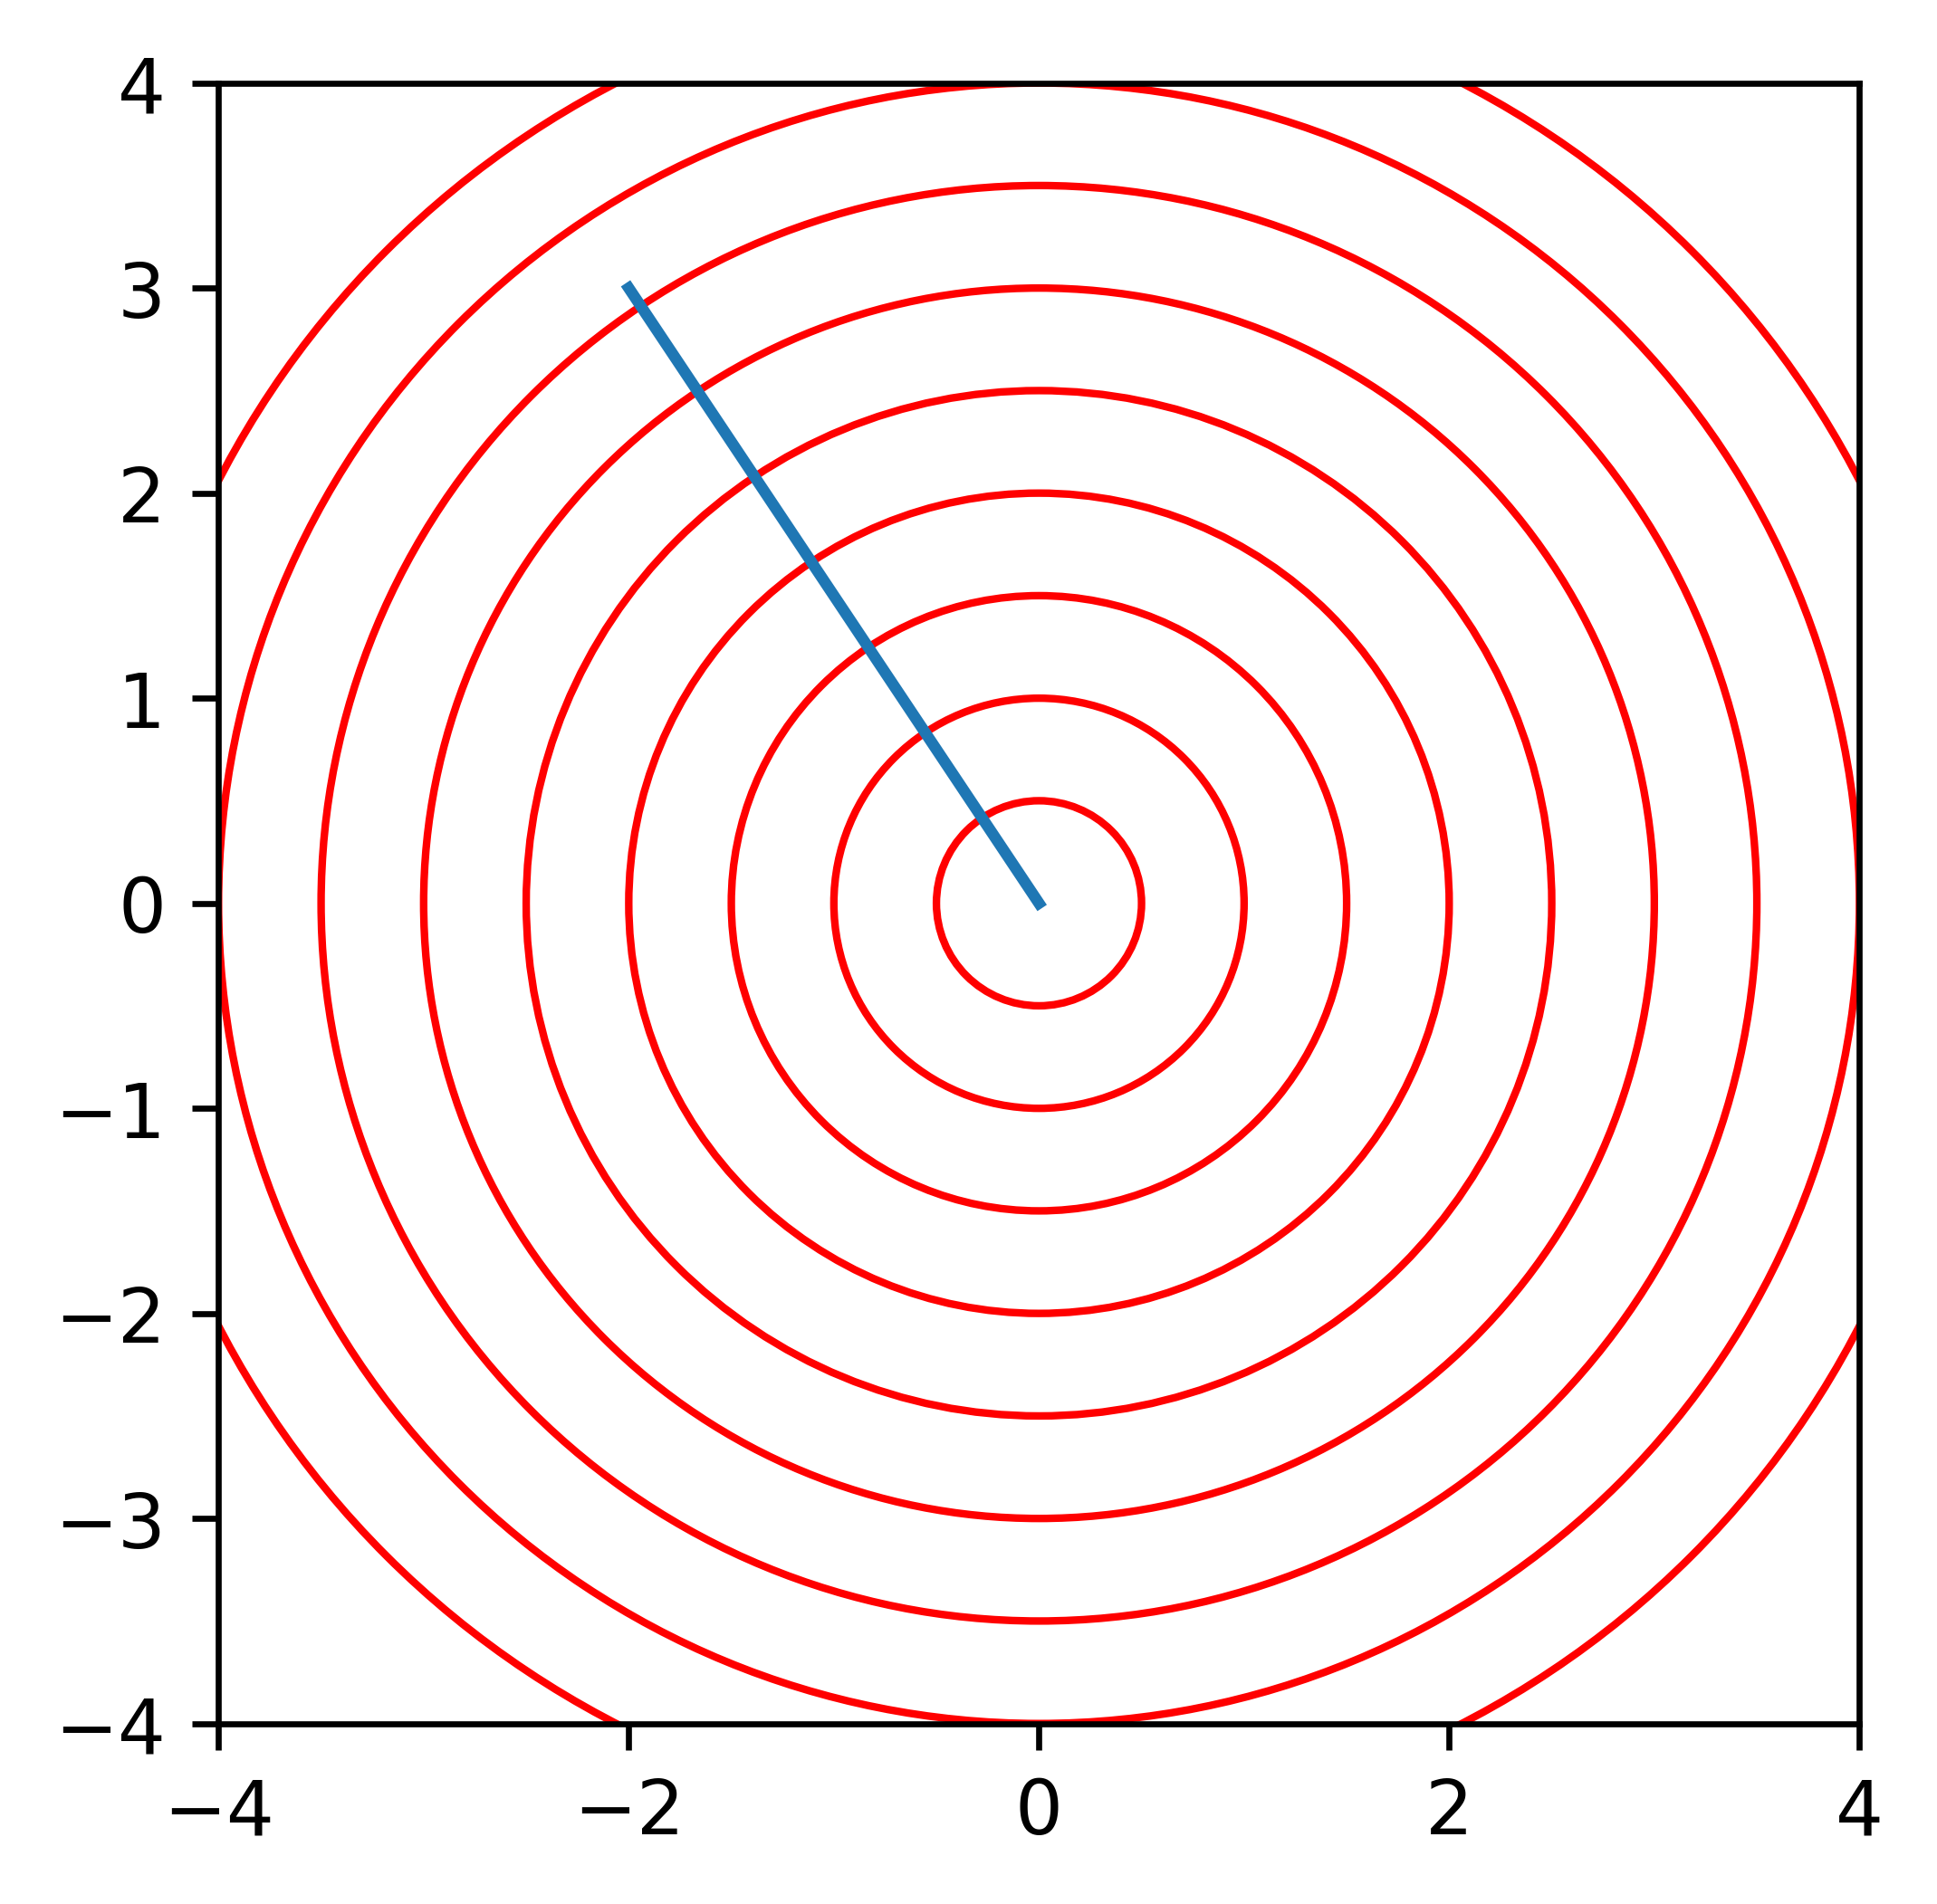

4.440892098500626e-16
-8.881784197001252e-16


In [6]:
experiment(a=1, b=1, T=2, learning_rate_ratio = 0.5)

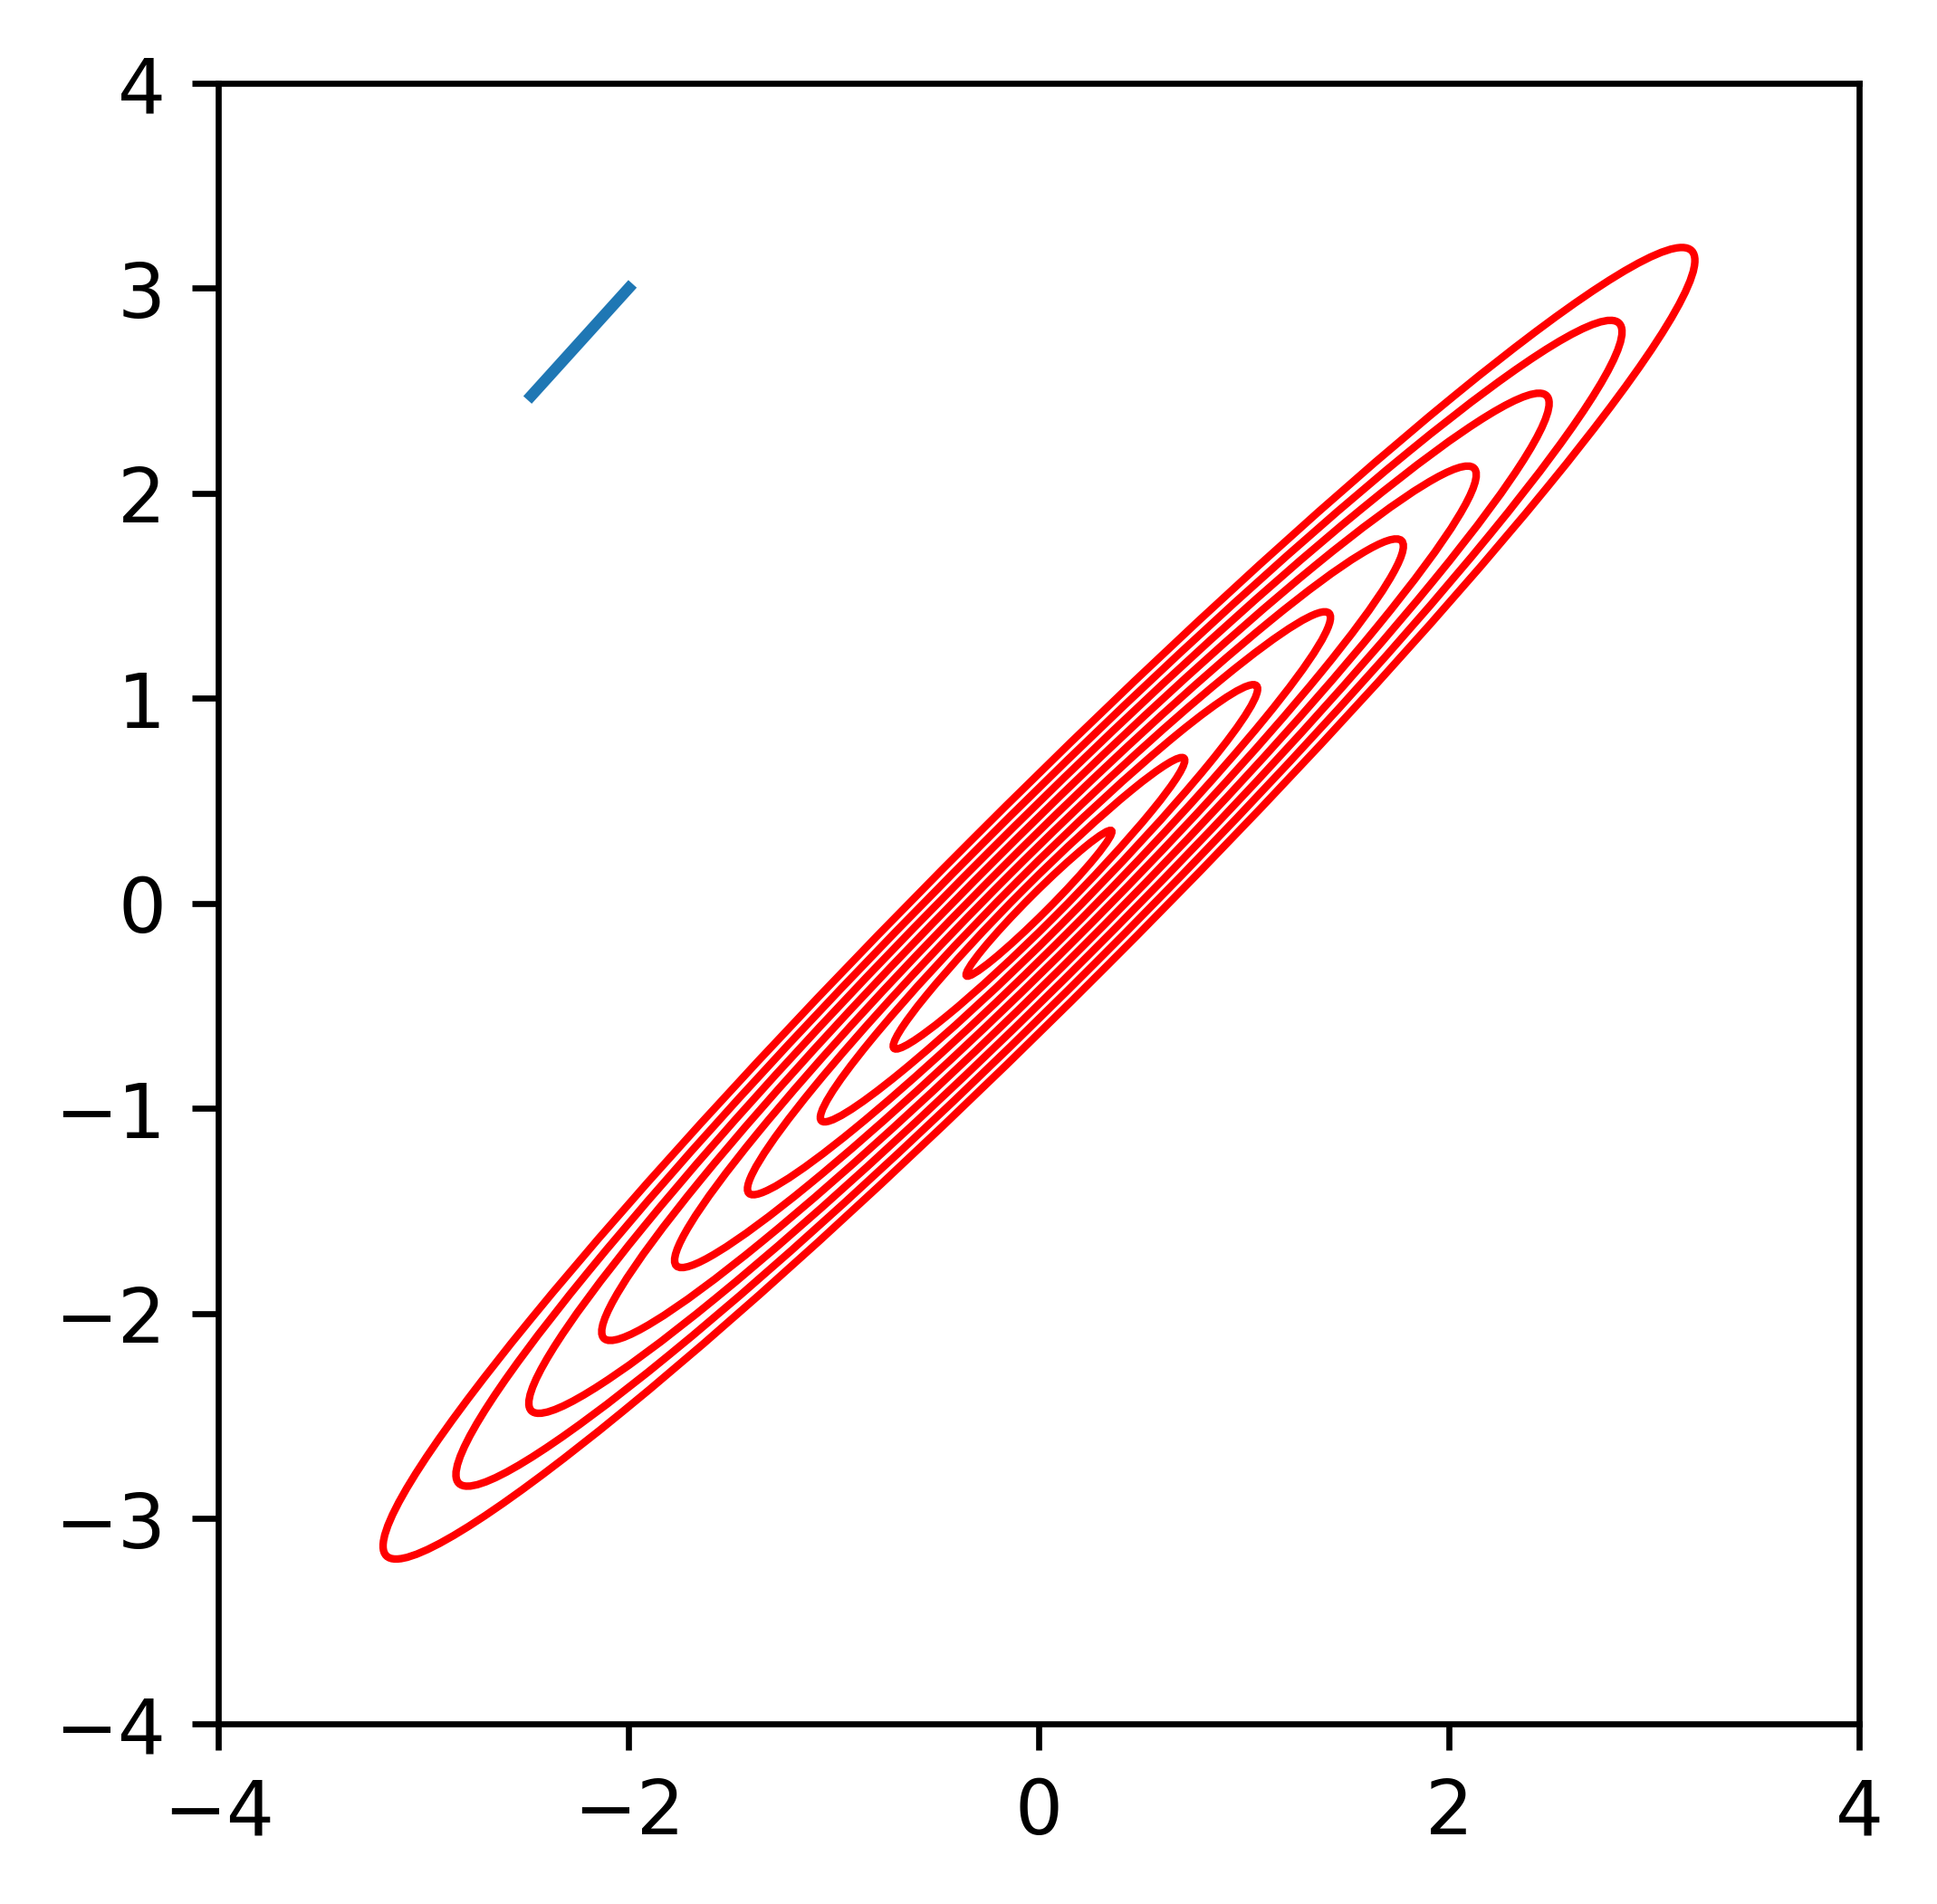

-2.475
2.475


In [8]:
experiment(a=1, b=1/10, T=2, learning_rate_ratio = 0.5)

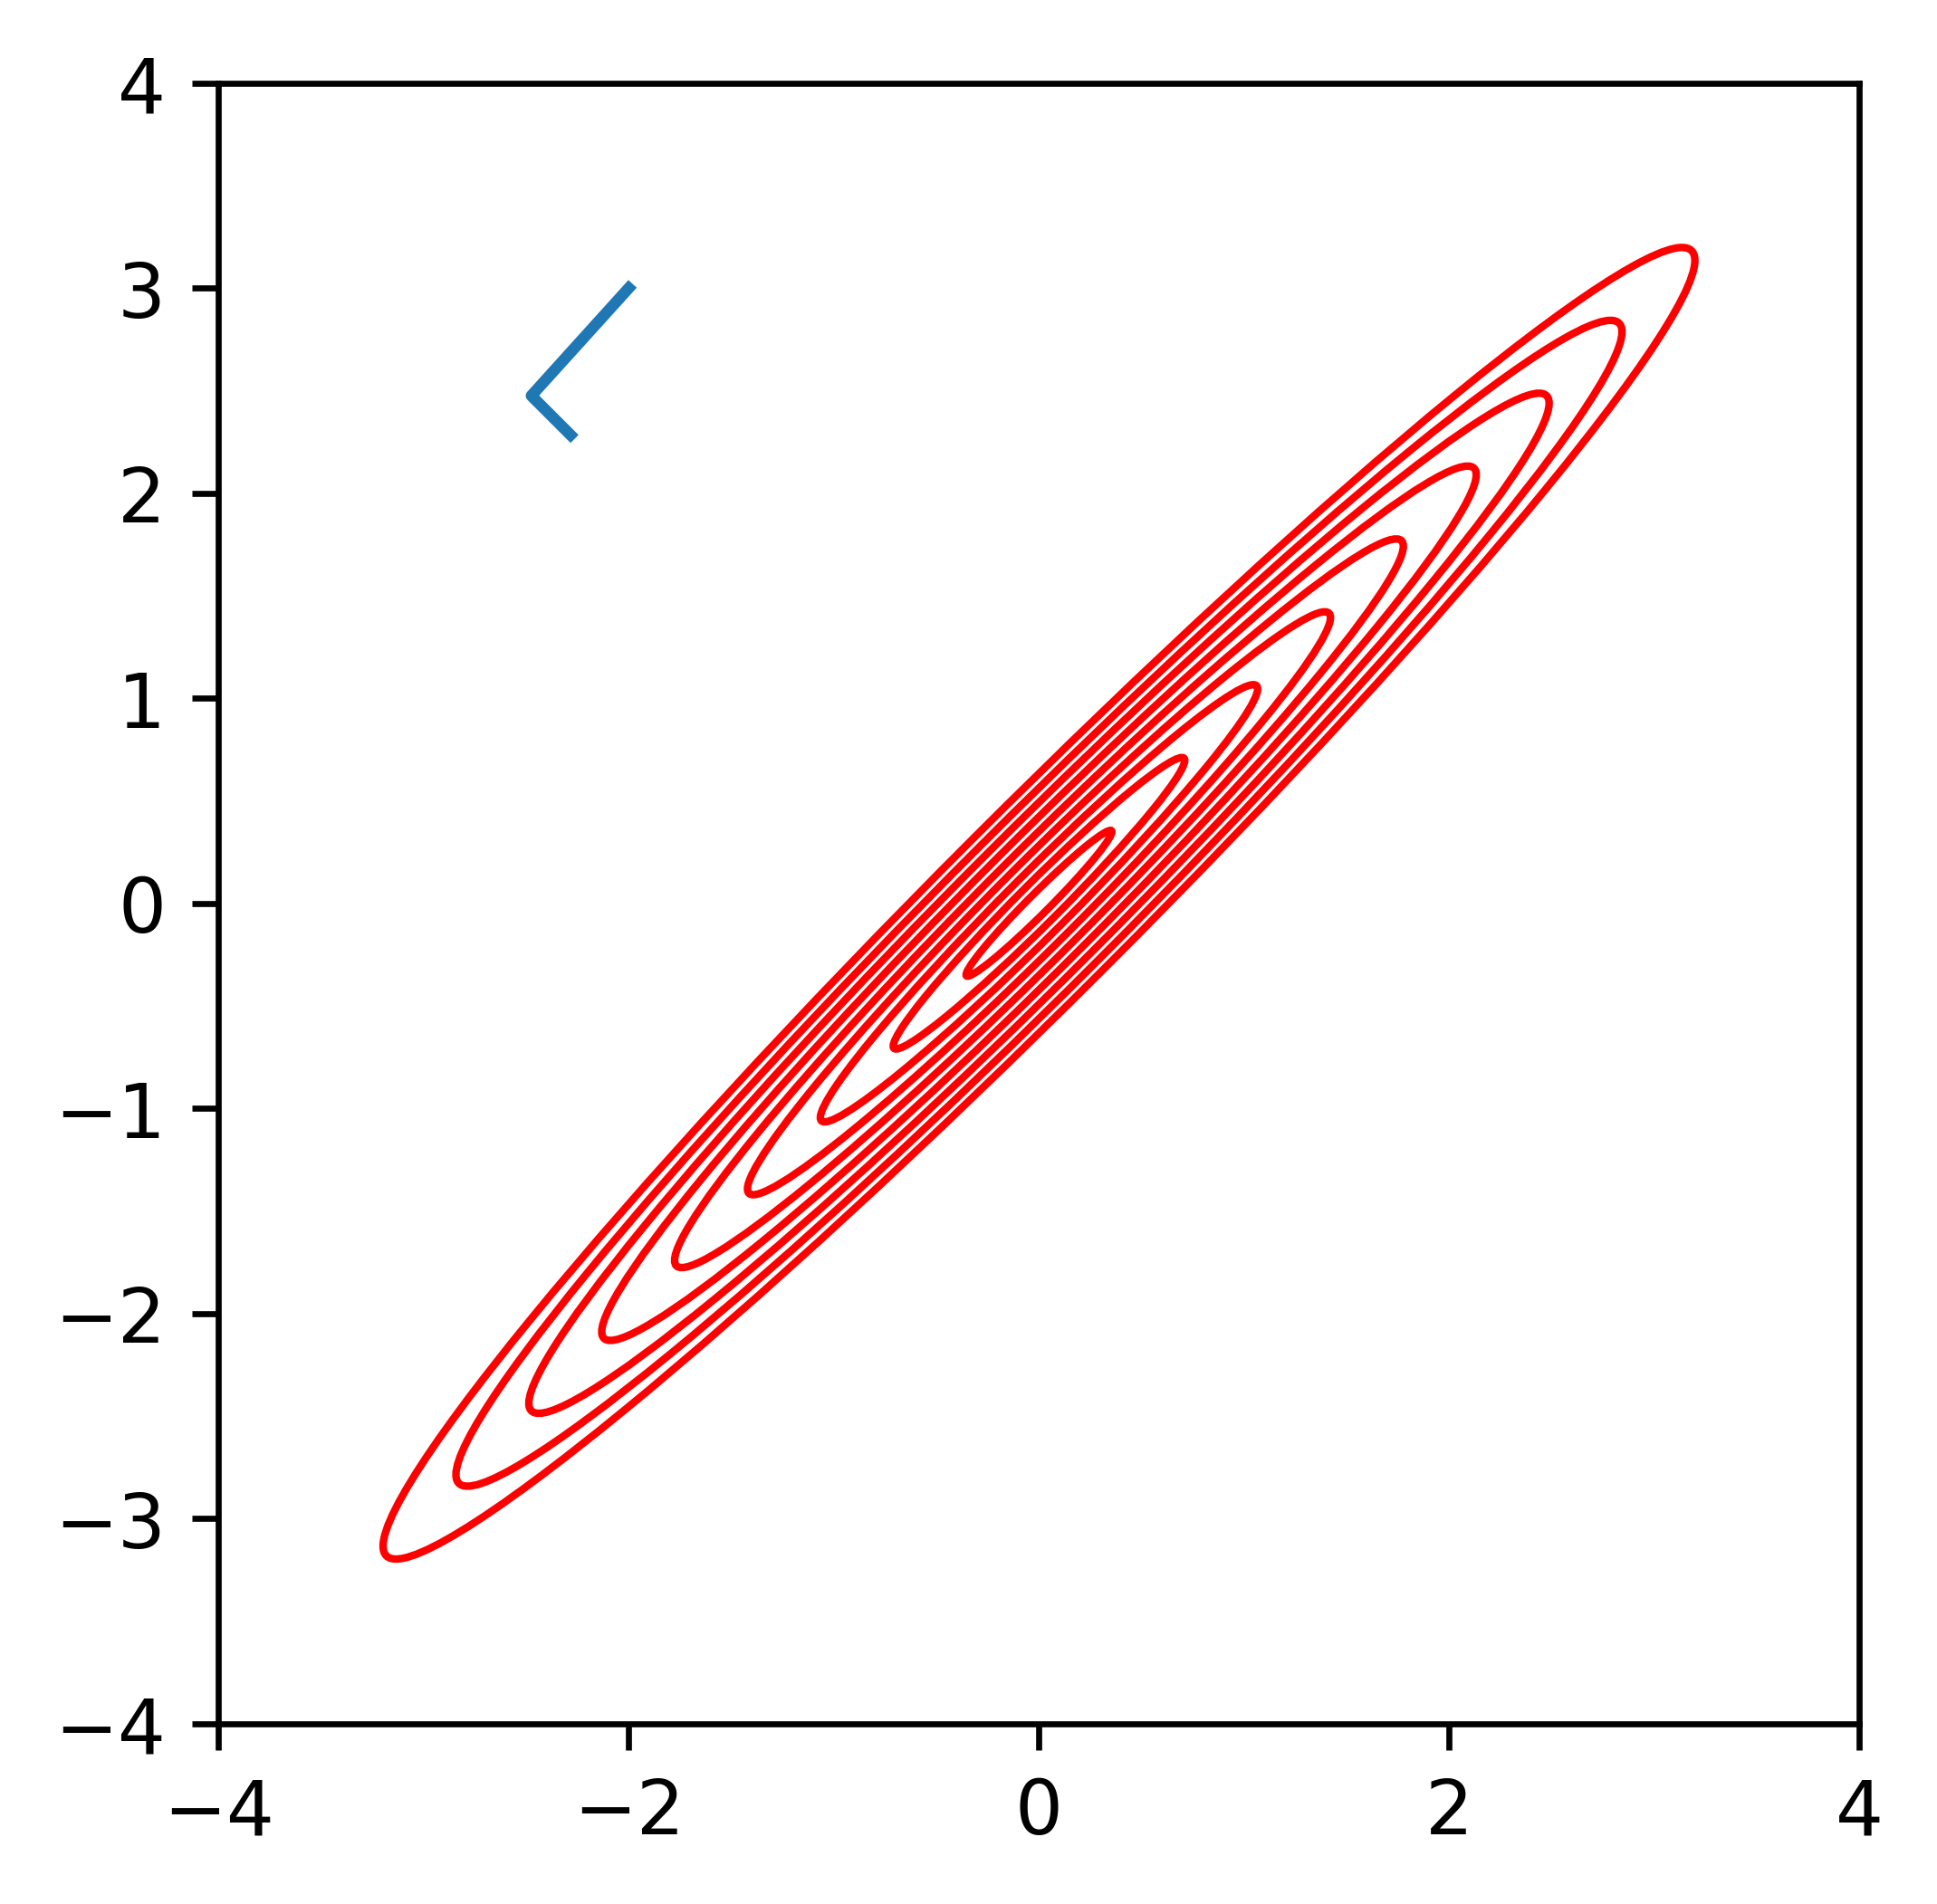

-2.283793118709102
2.283793118709102


In [9]:
experiment(a=1, b=1/10, T=10, learning_rate_ratio = 0.5)

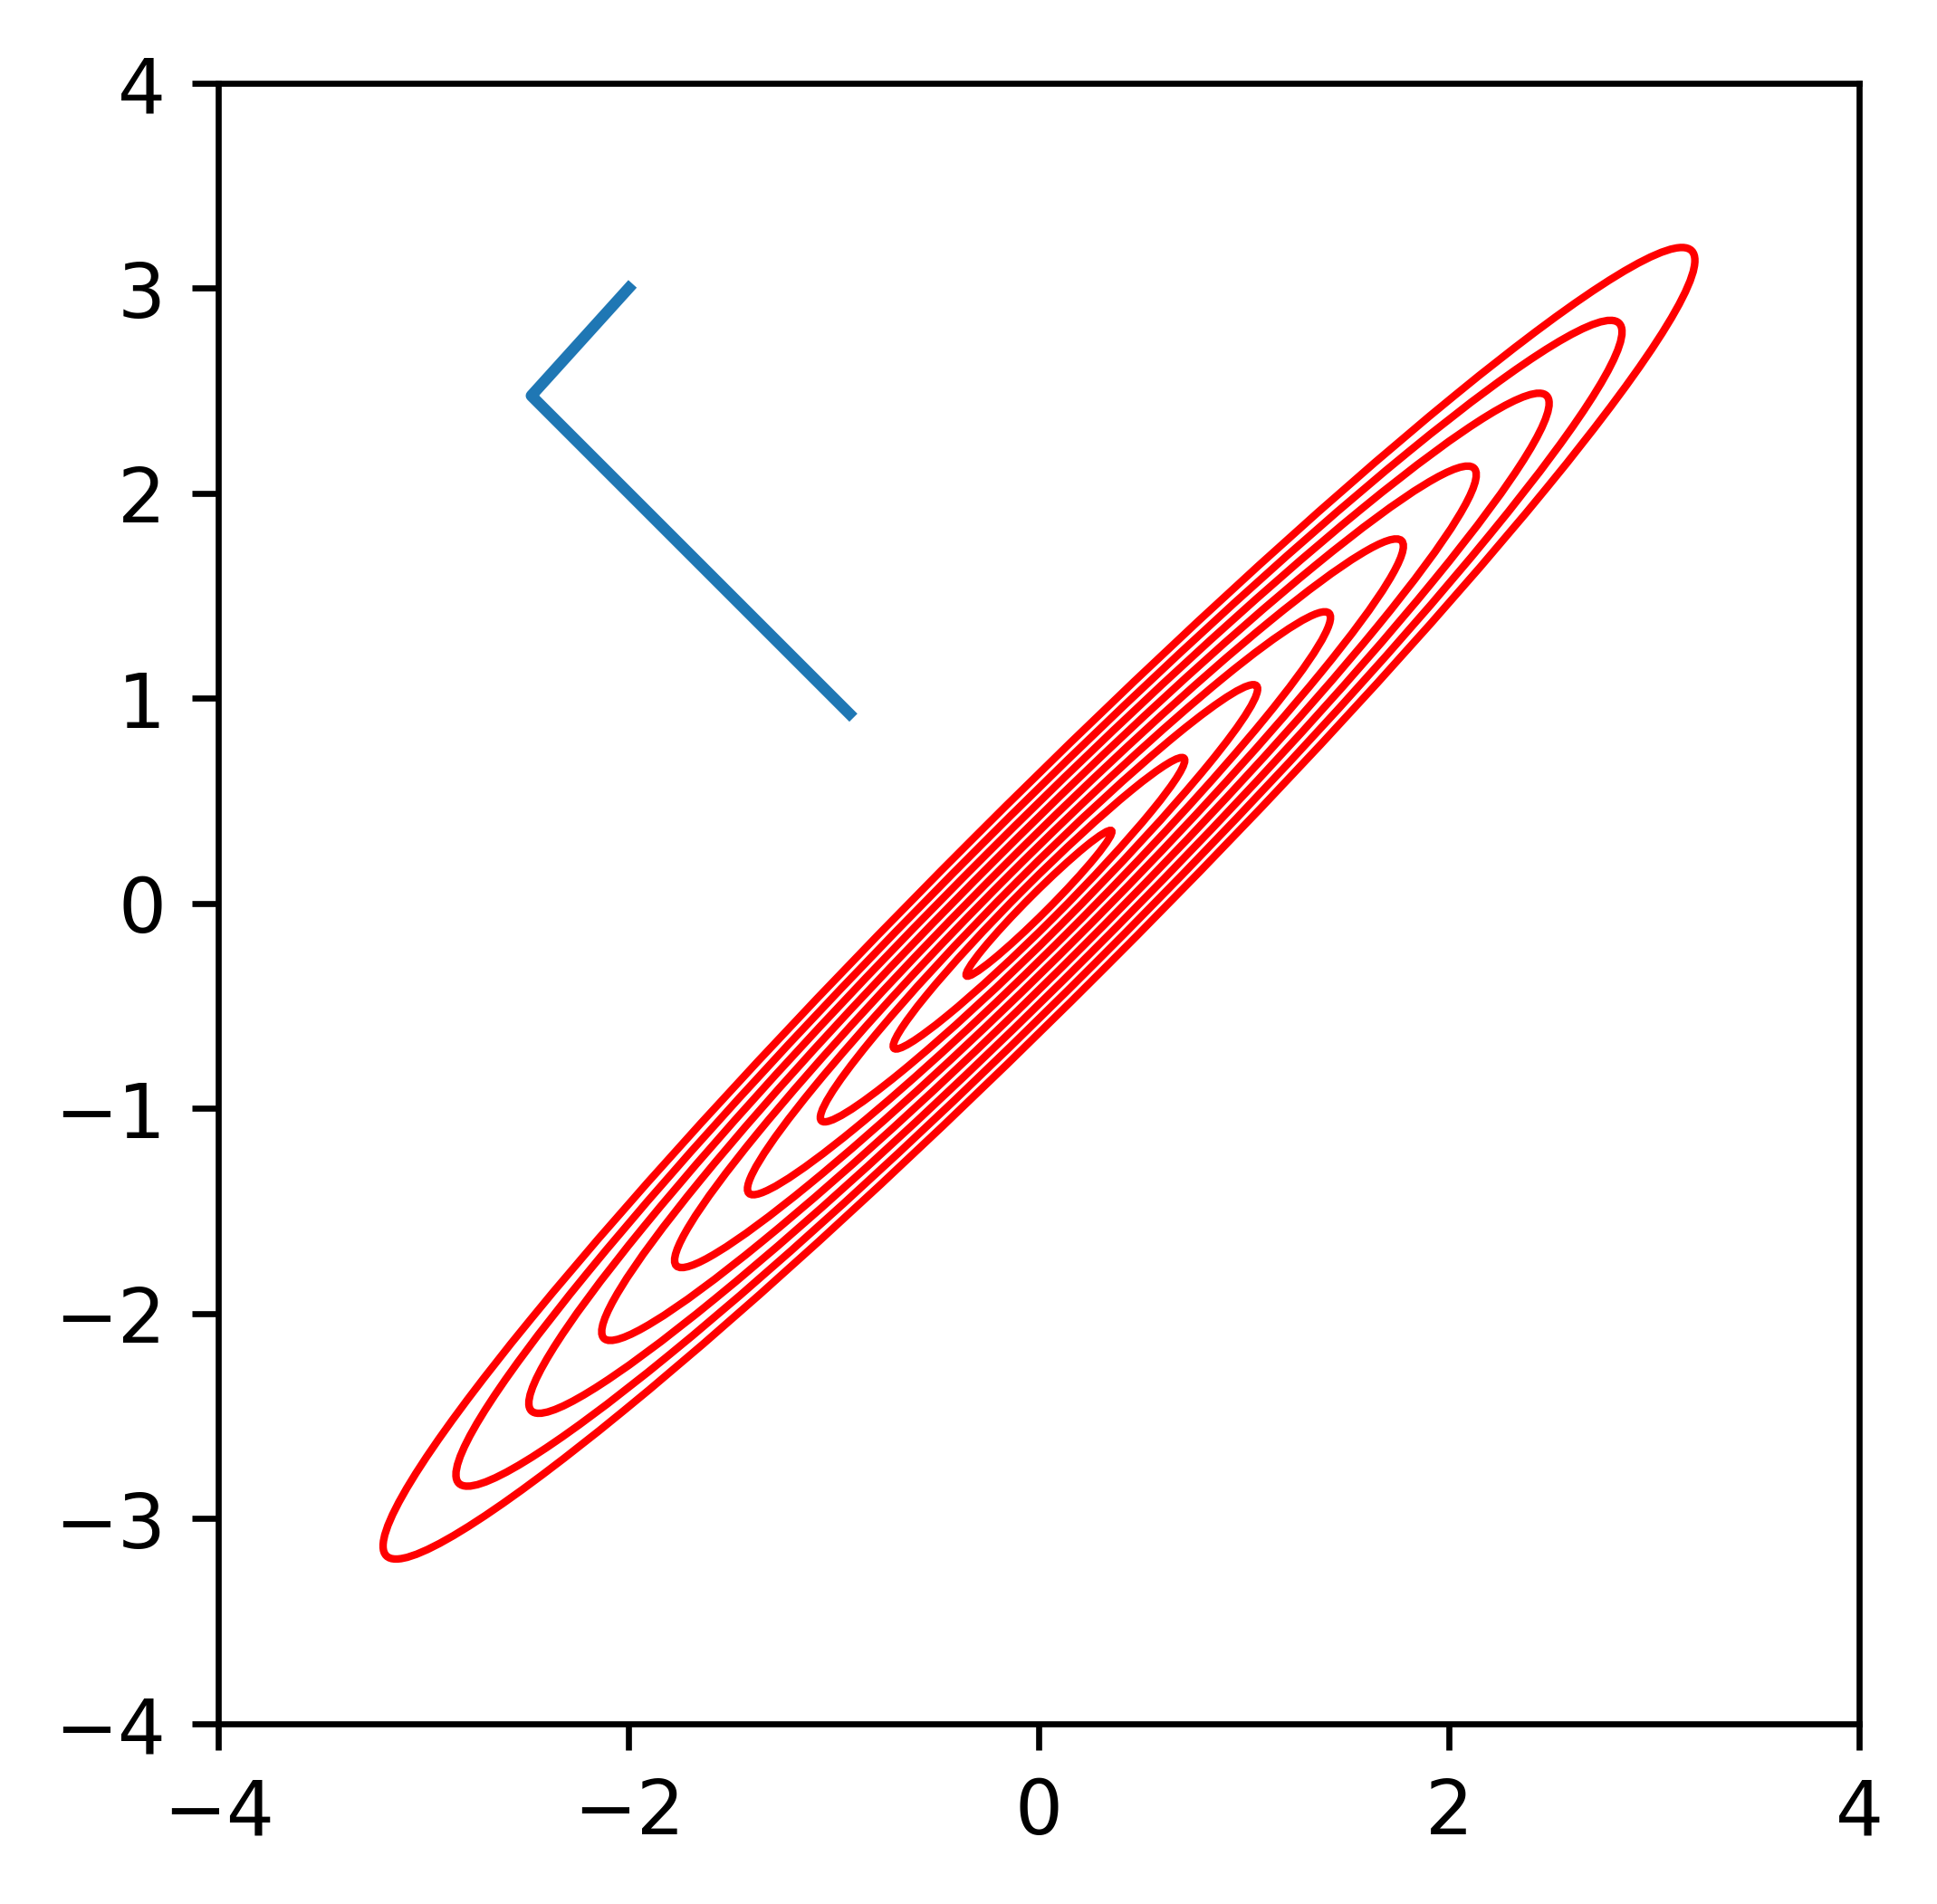

-0.9243240941243164
0.9243240941243164


In [10]:
experiment(a=1, b=1/10, T=100, learning_rate_ratio = 0.5)

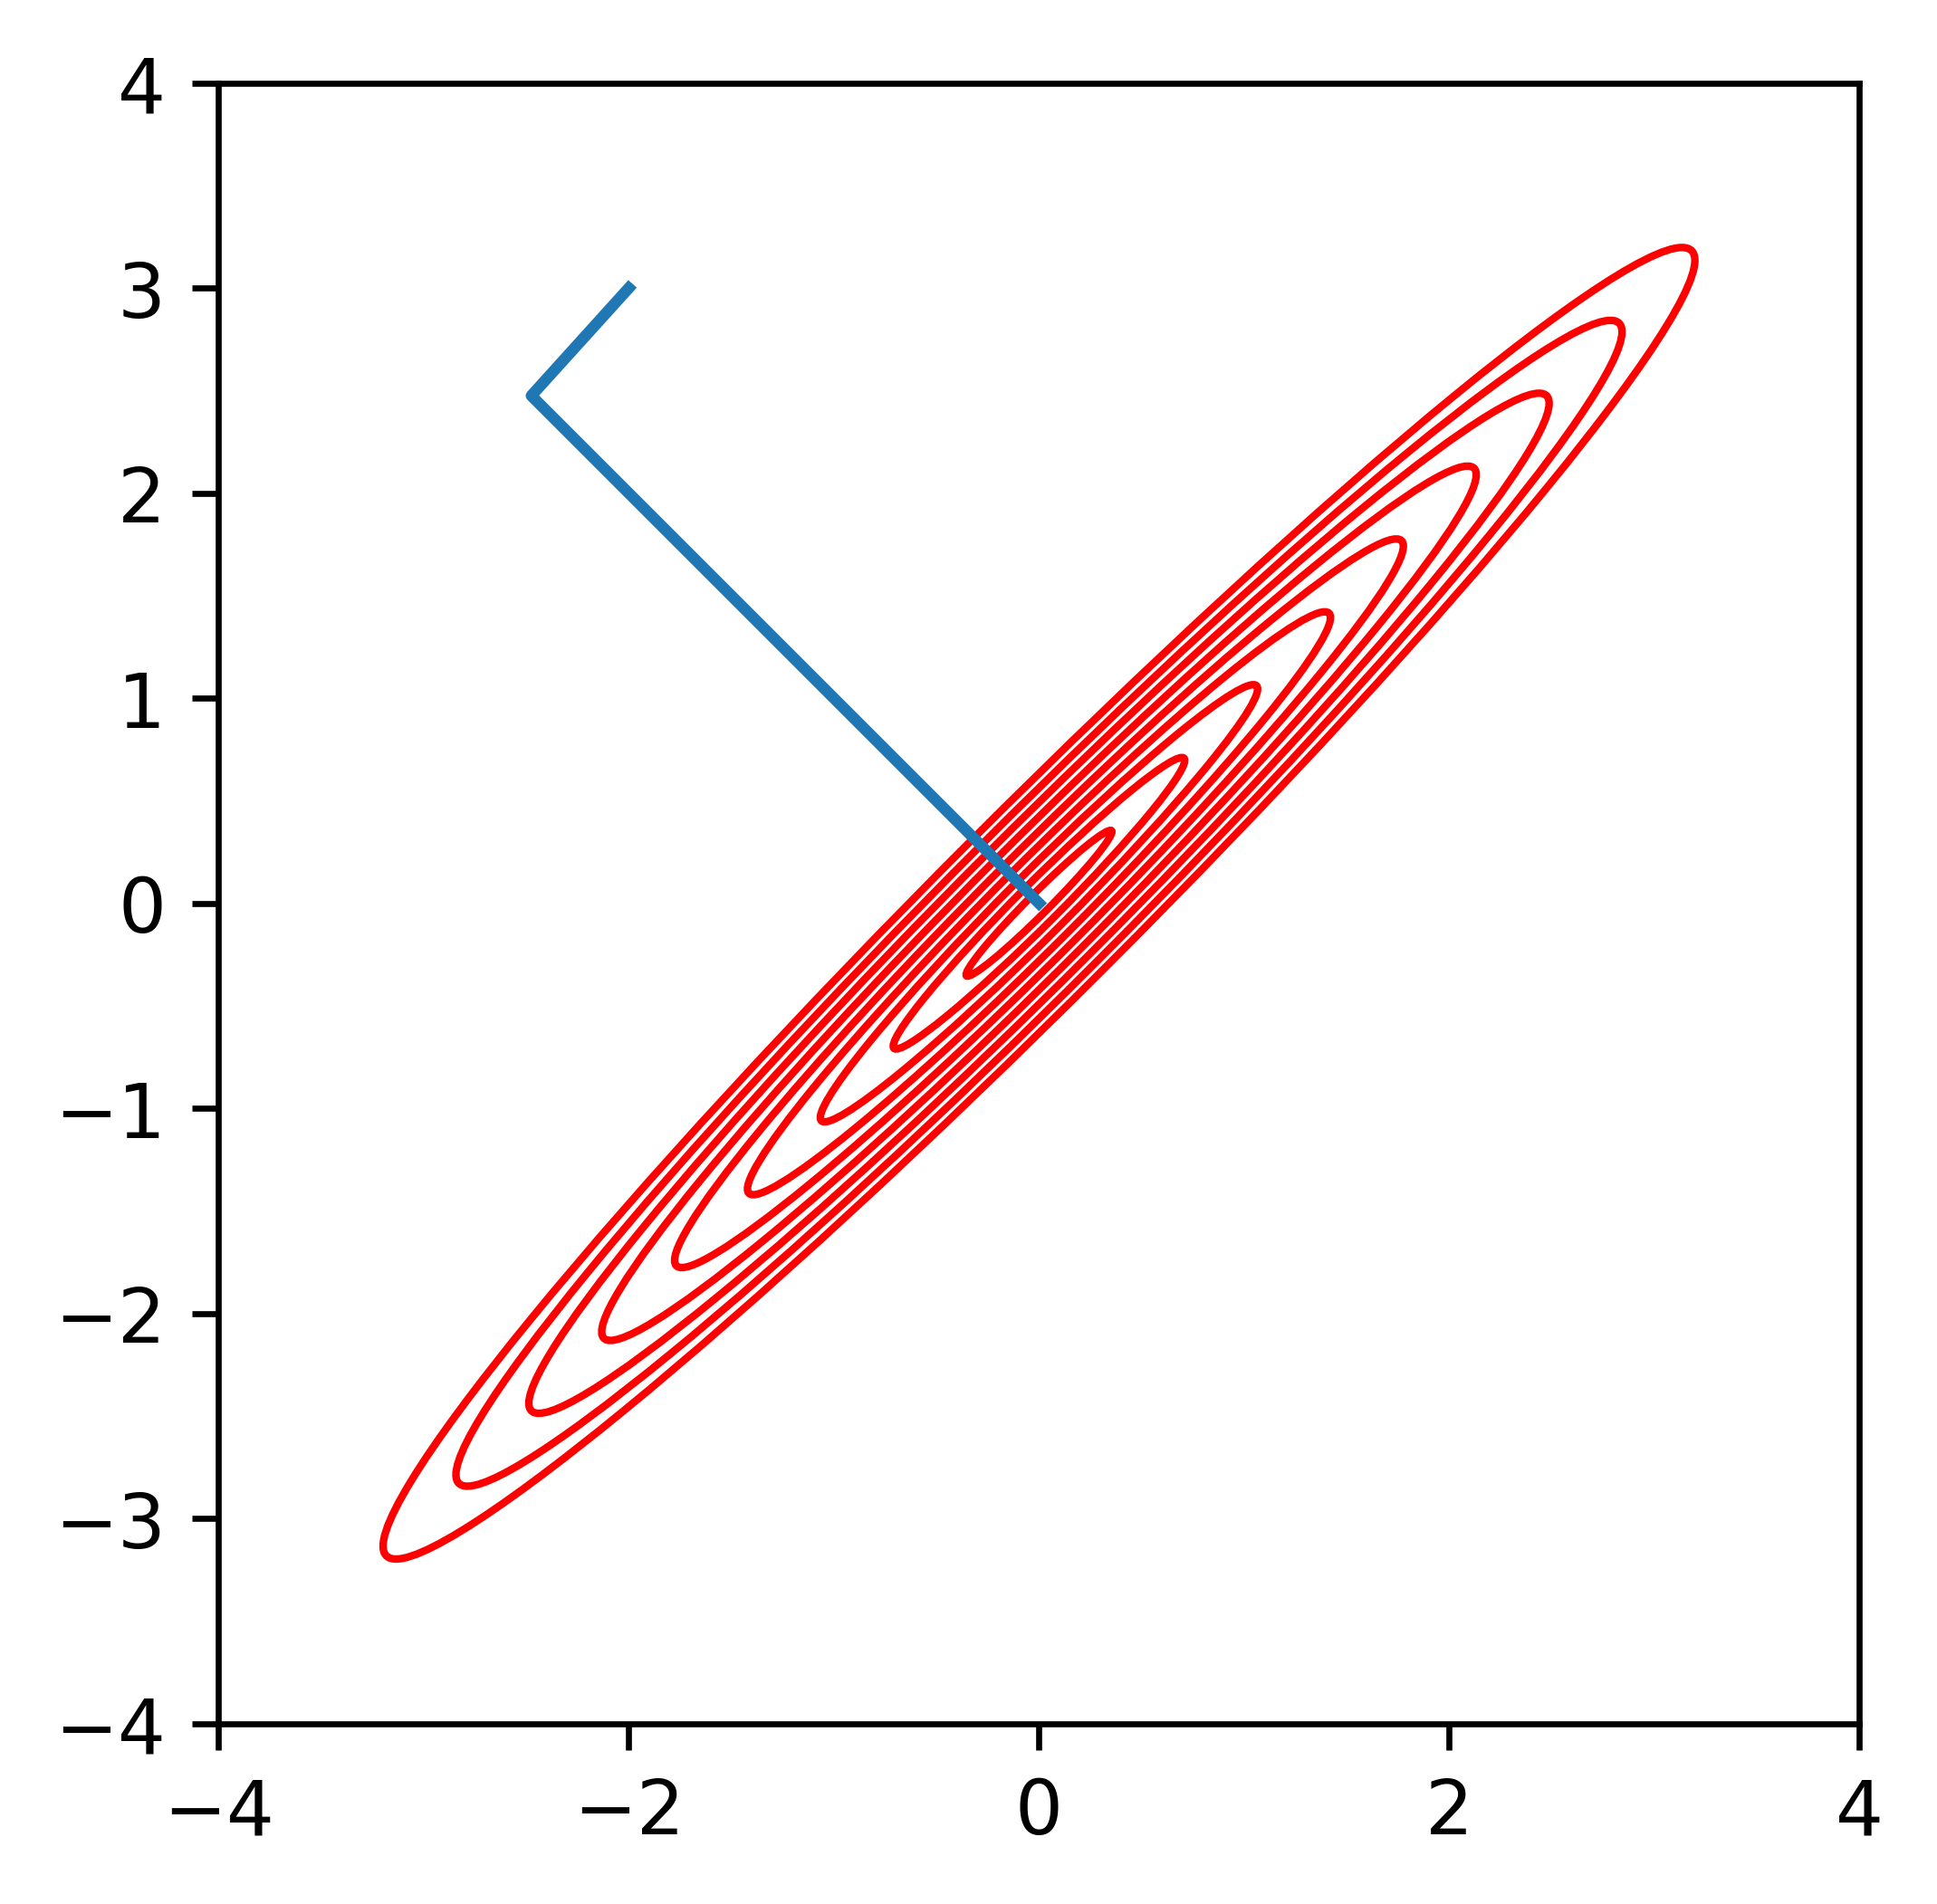

-0.00010901830154206606
0.00010901830154206606


In [11]:
experiment(a=1, b=1/10, T=1000, learning_rate_ratio = 0.5)

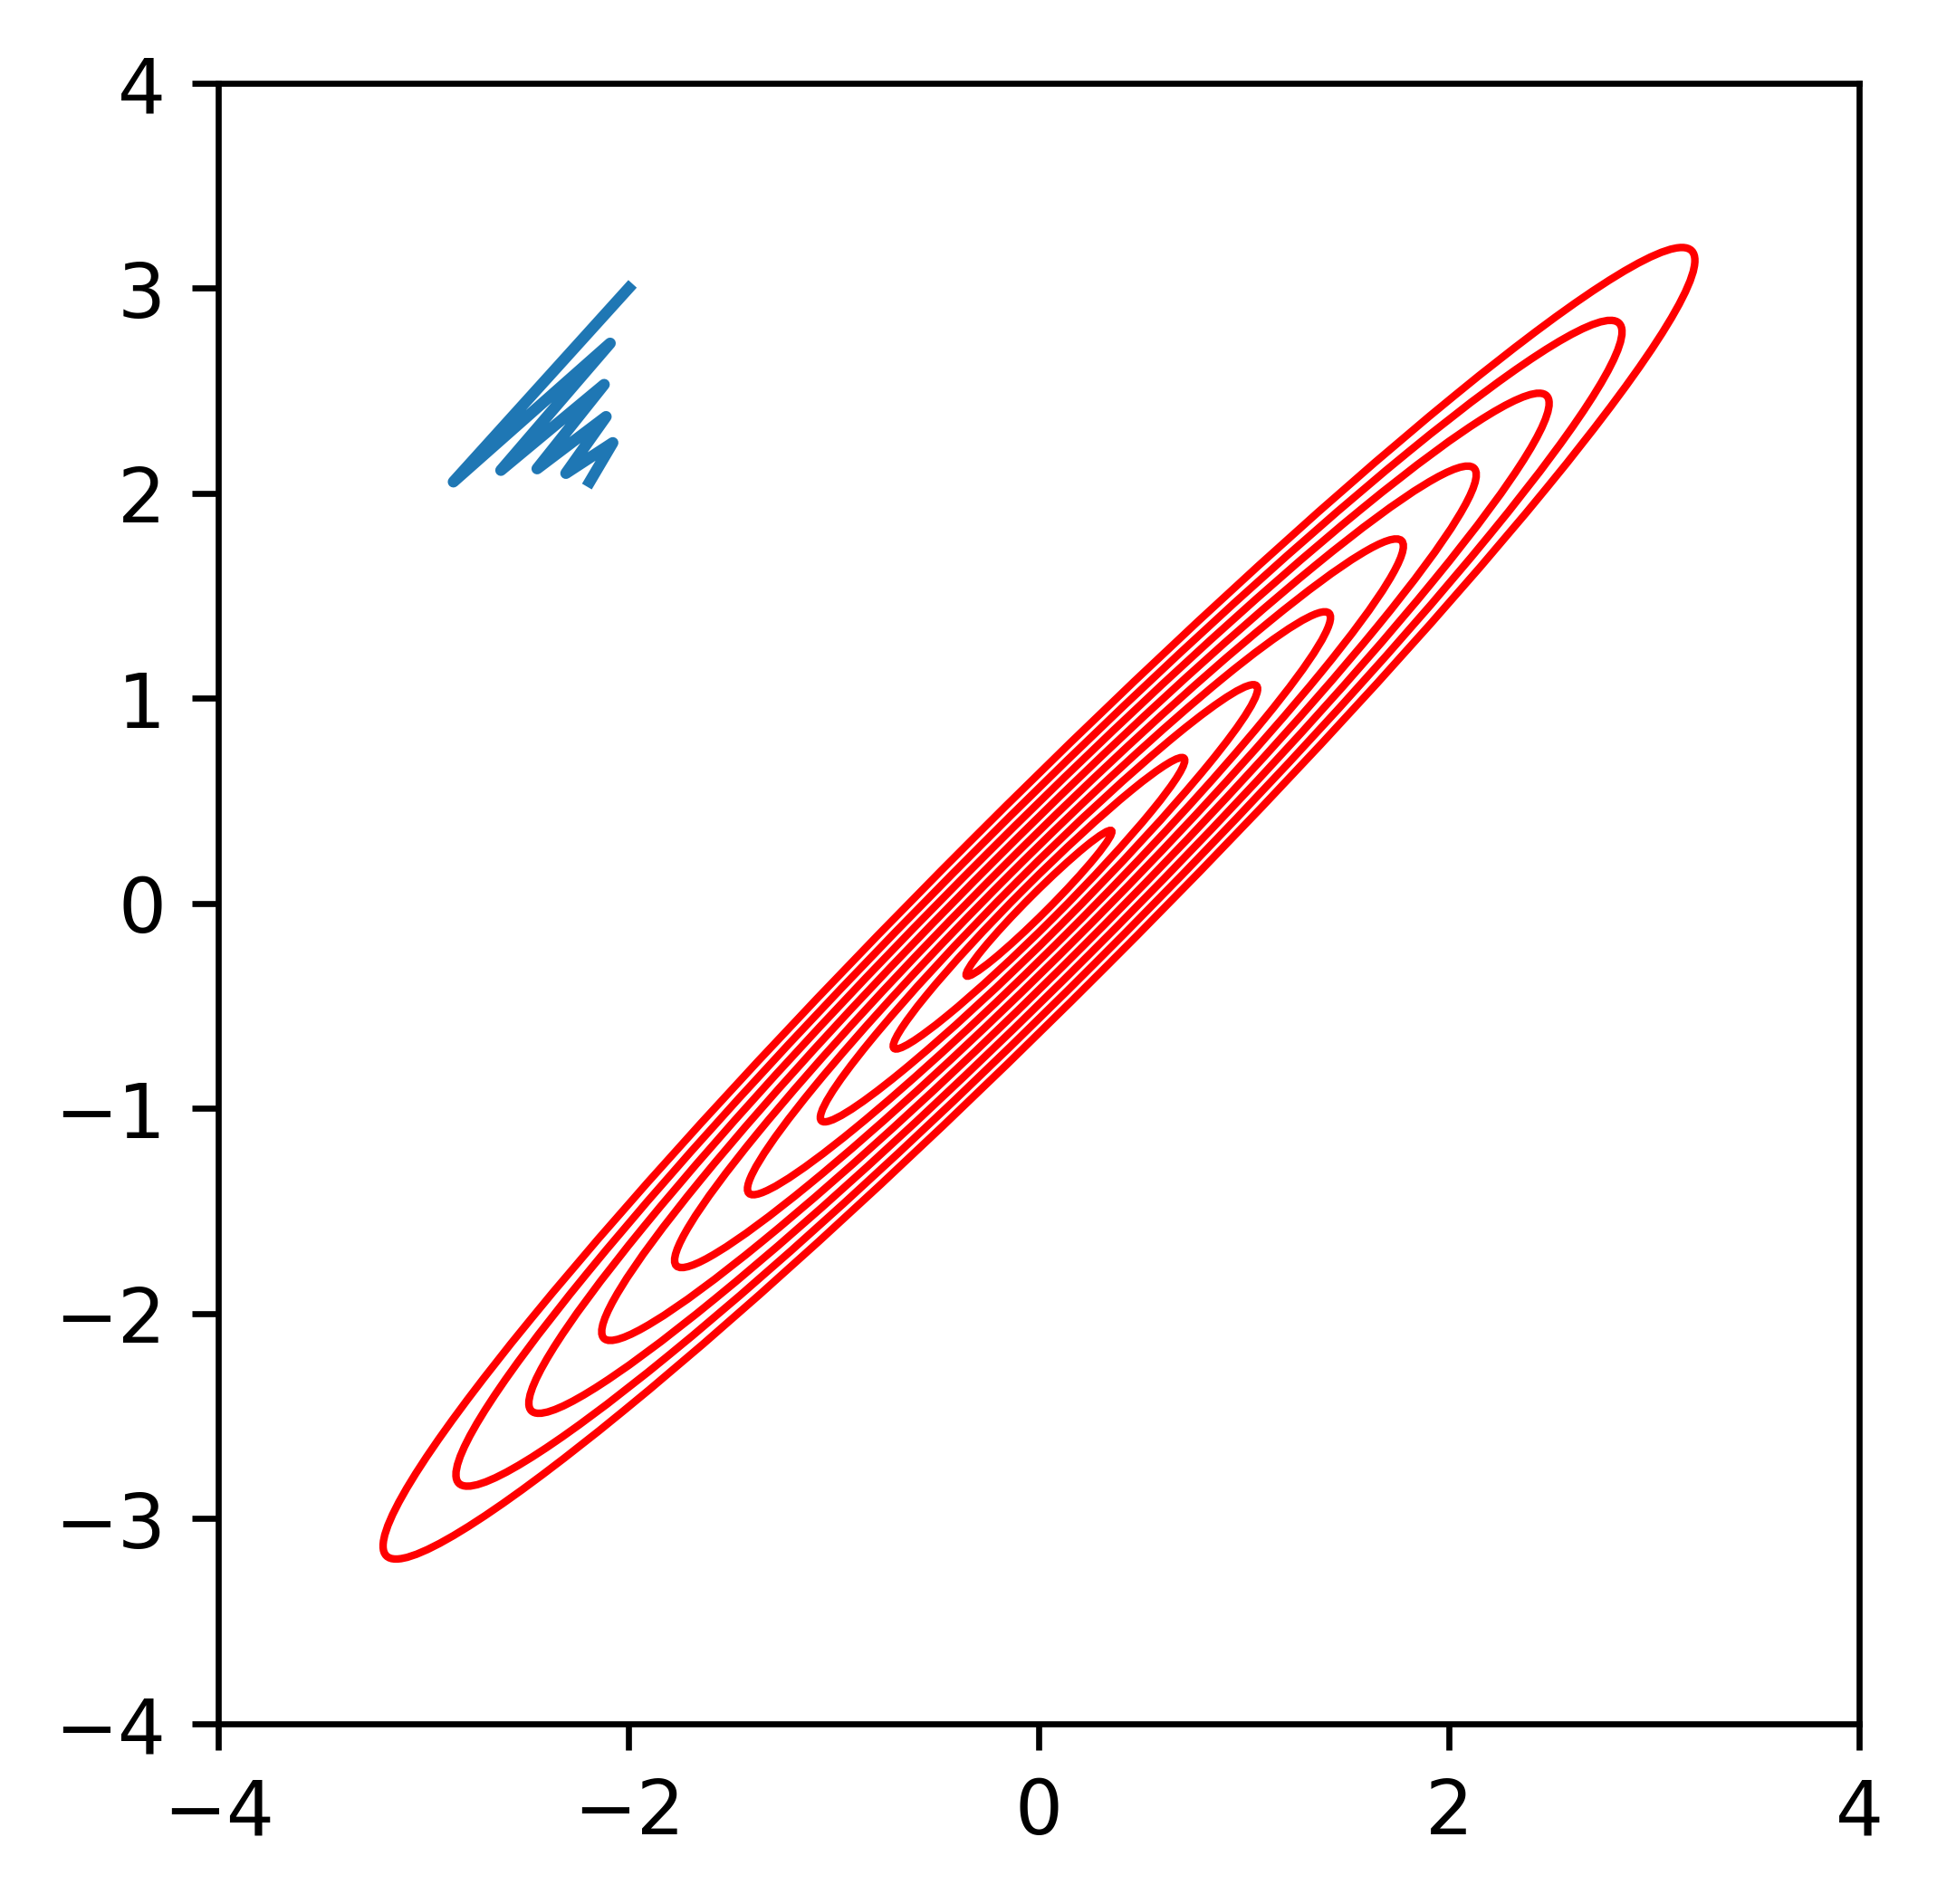

-2.1900766233137943
2.0558588953137935


In [12]:
experiment(a=1, b=1/10, T=10, learning_rate_ratio = 0.9)

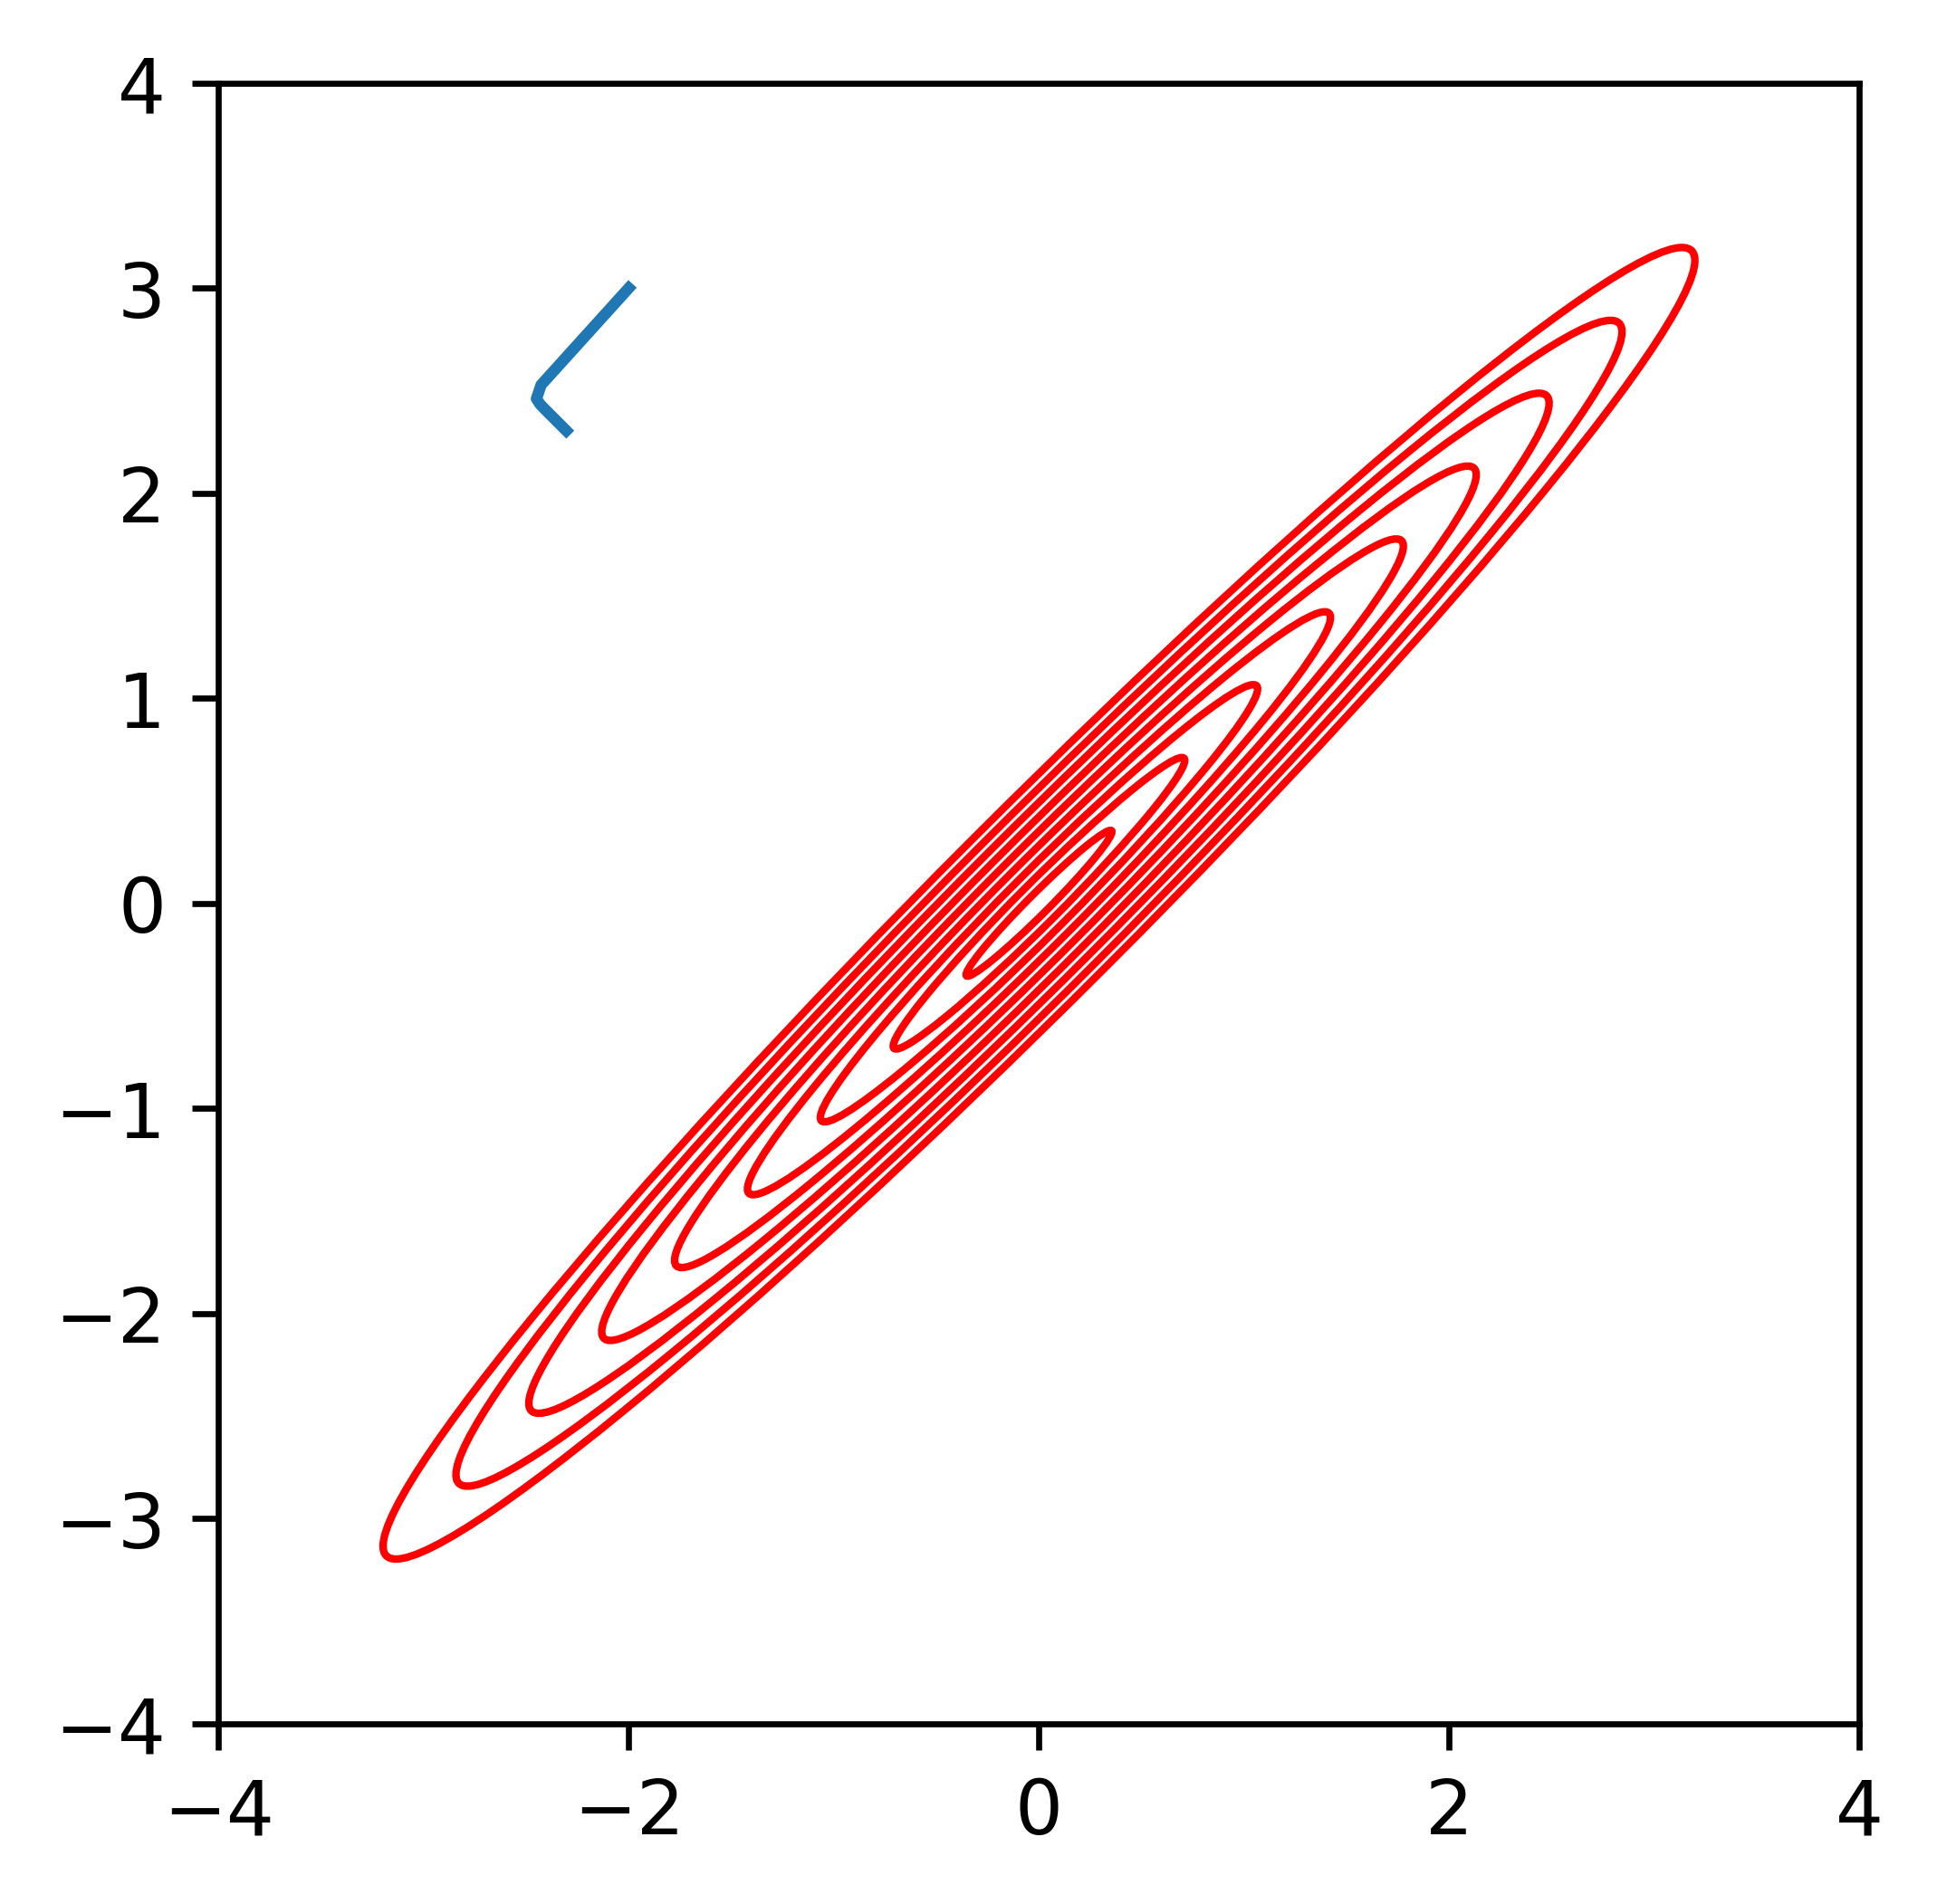

-2.304638957725738
2.304638958725738


In [13]:
experiment(a=1, b=1/10, T=10, learning_rate_ratio = 0.45)

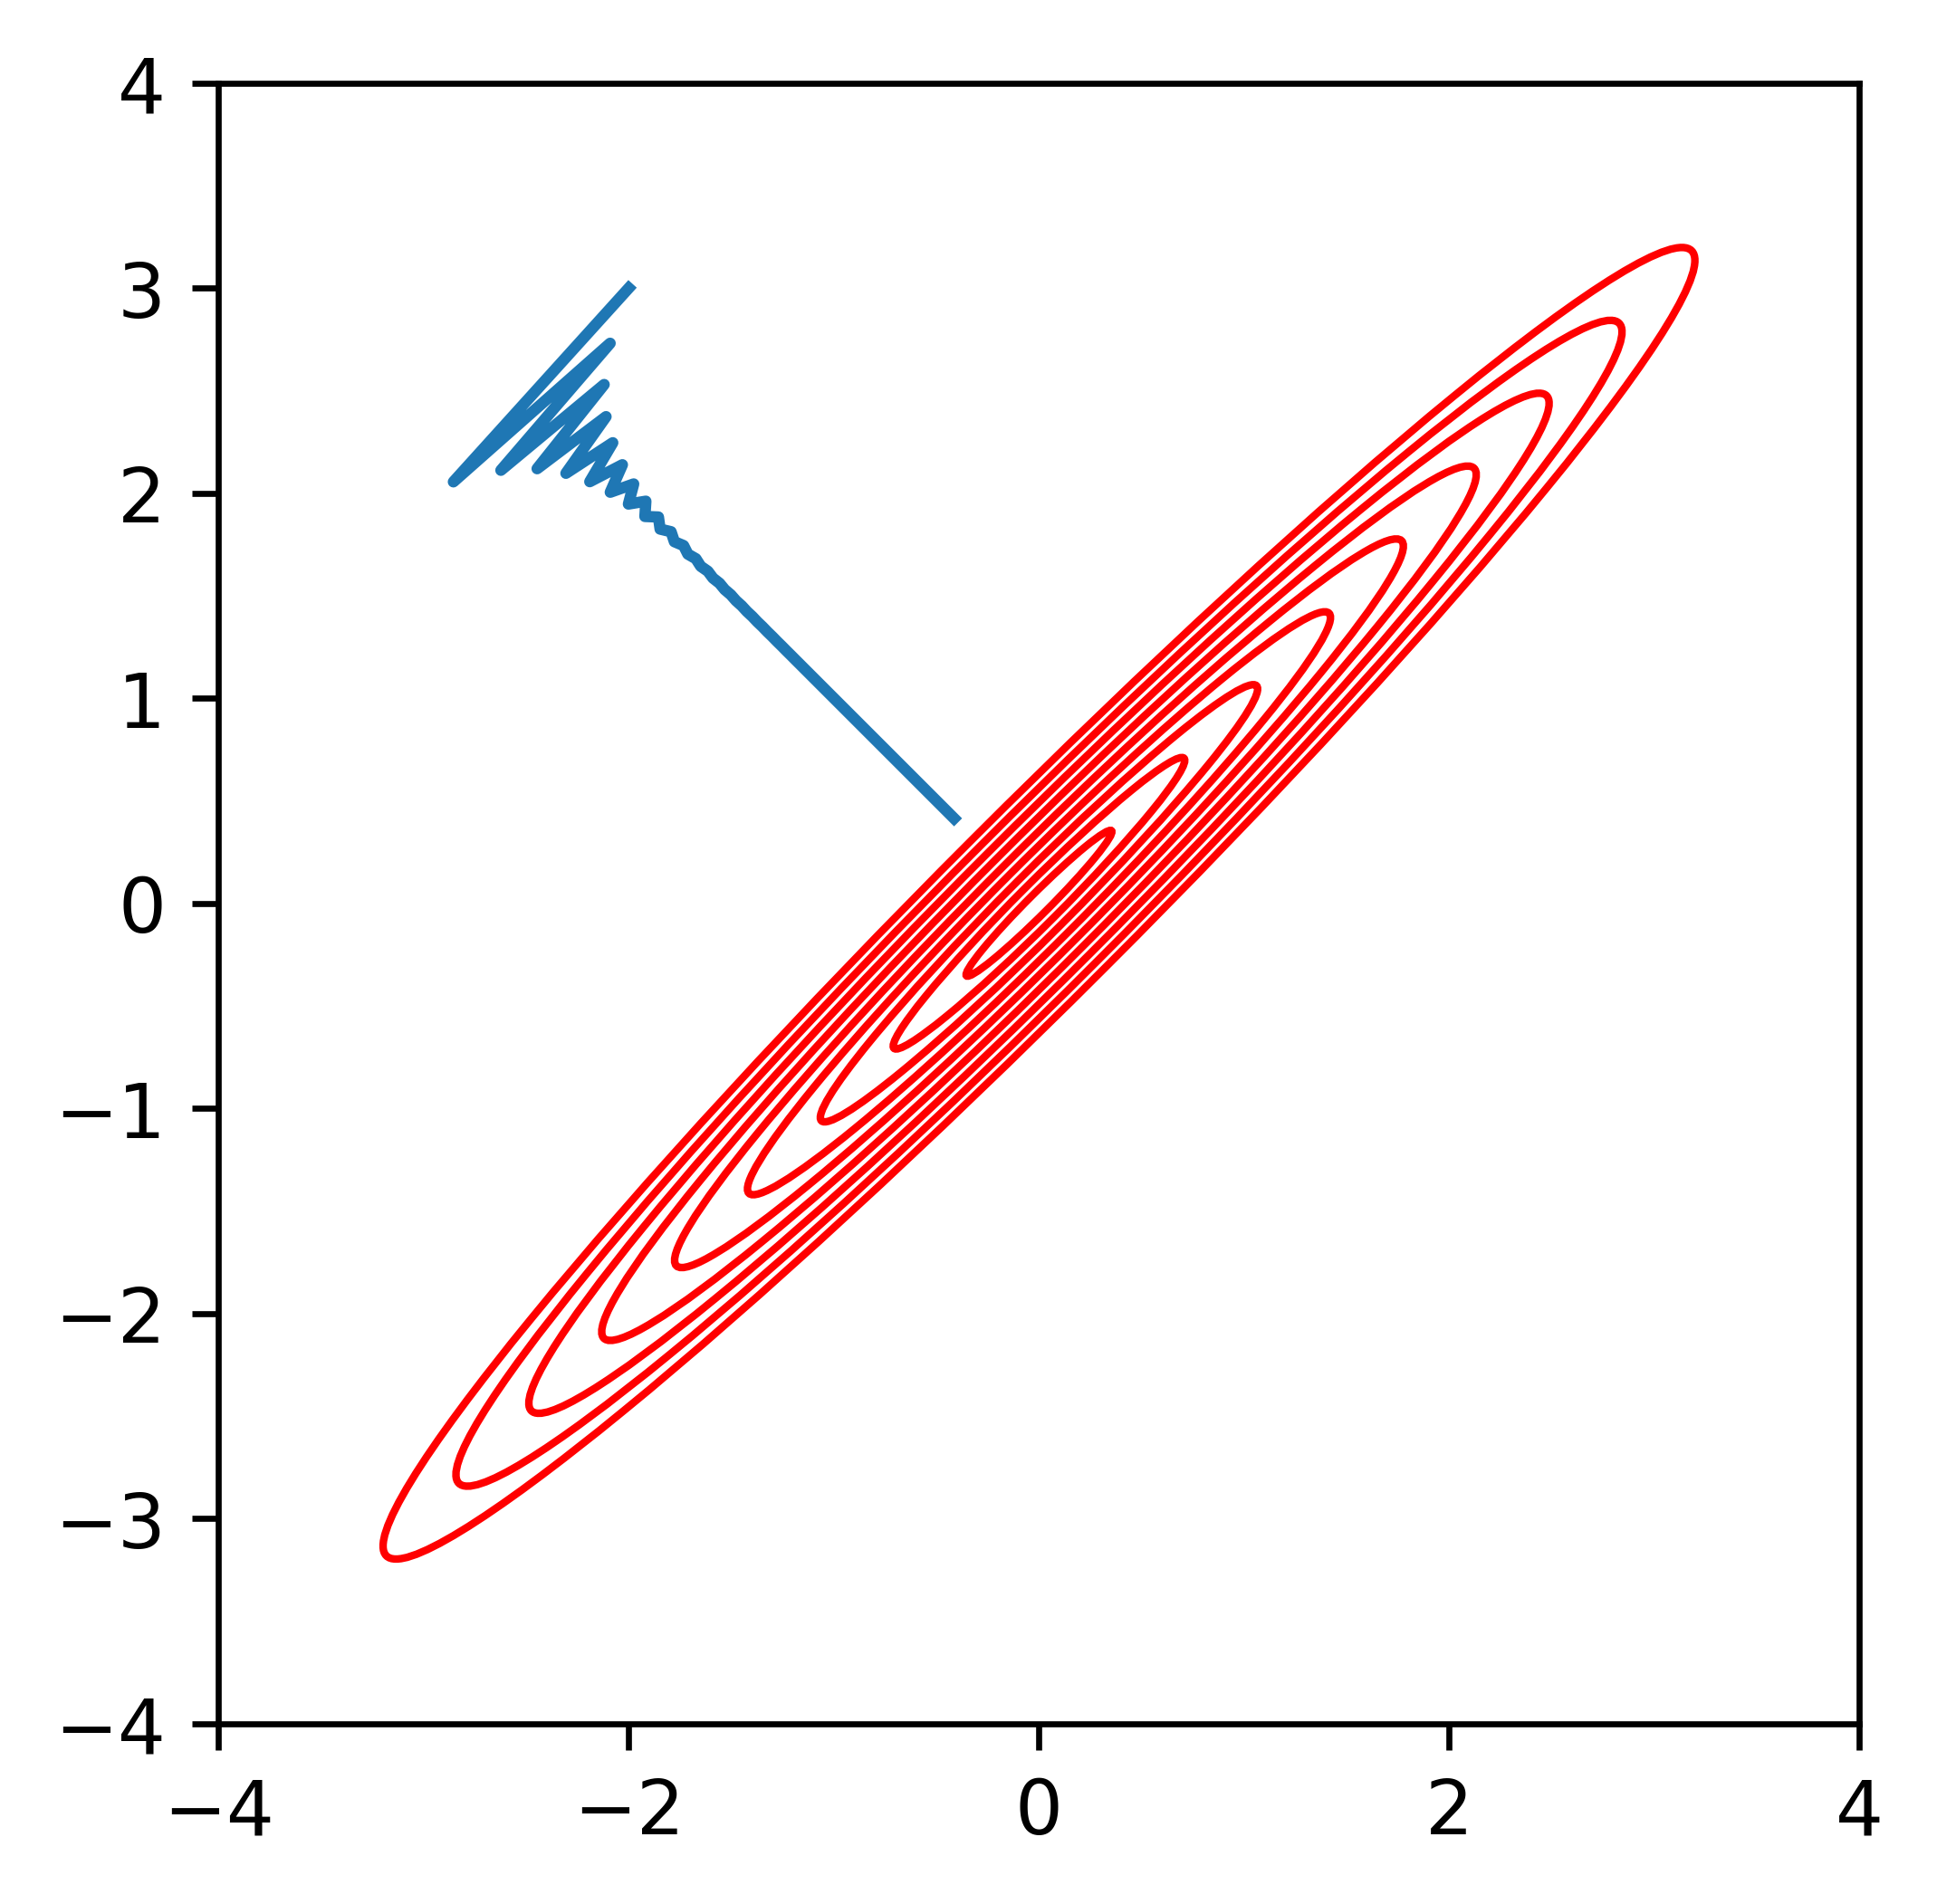

-0.41397803589507154
0.41397803564044183


In [14]:
experiment(a=1, b=1/10, T=100, learning_rate_ratio = 0.9)

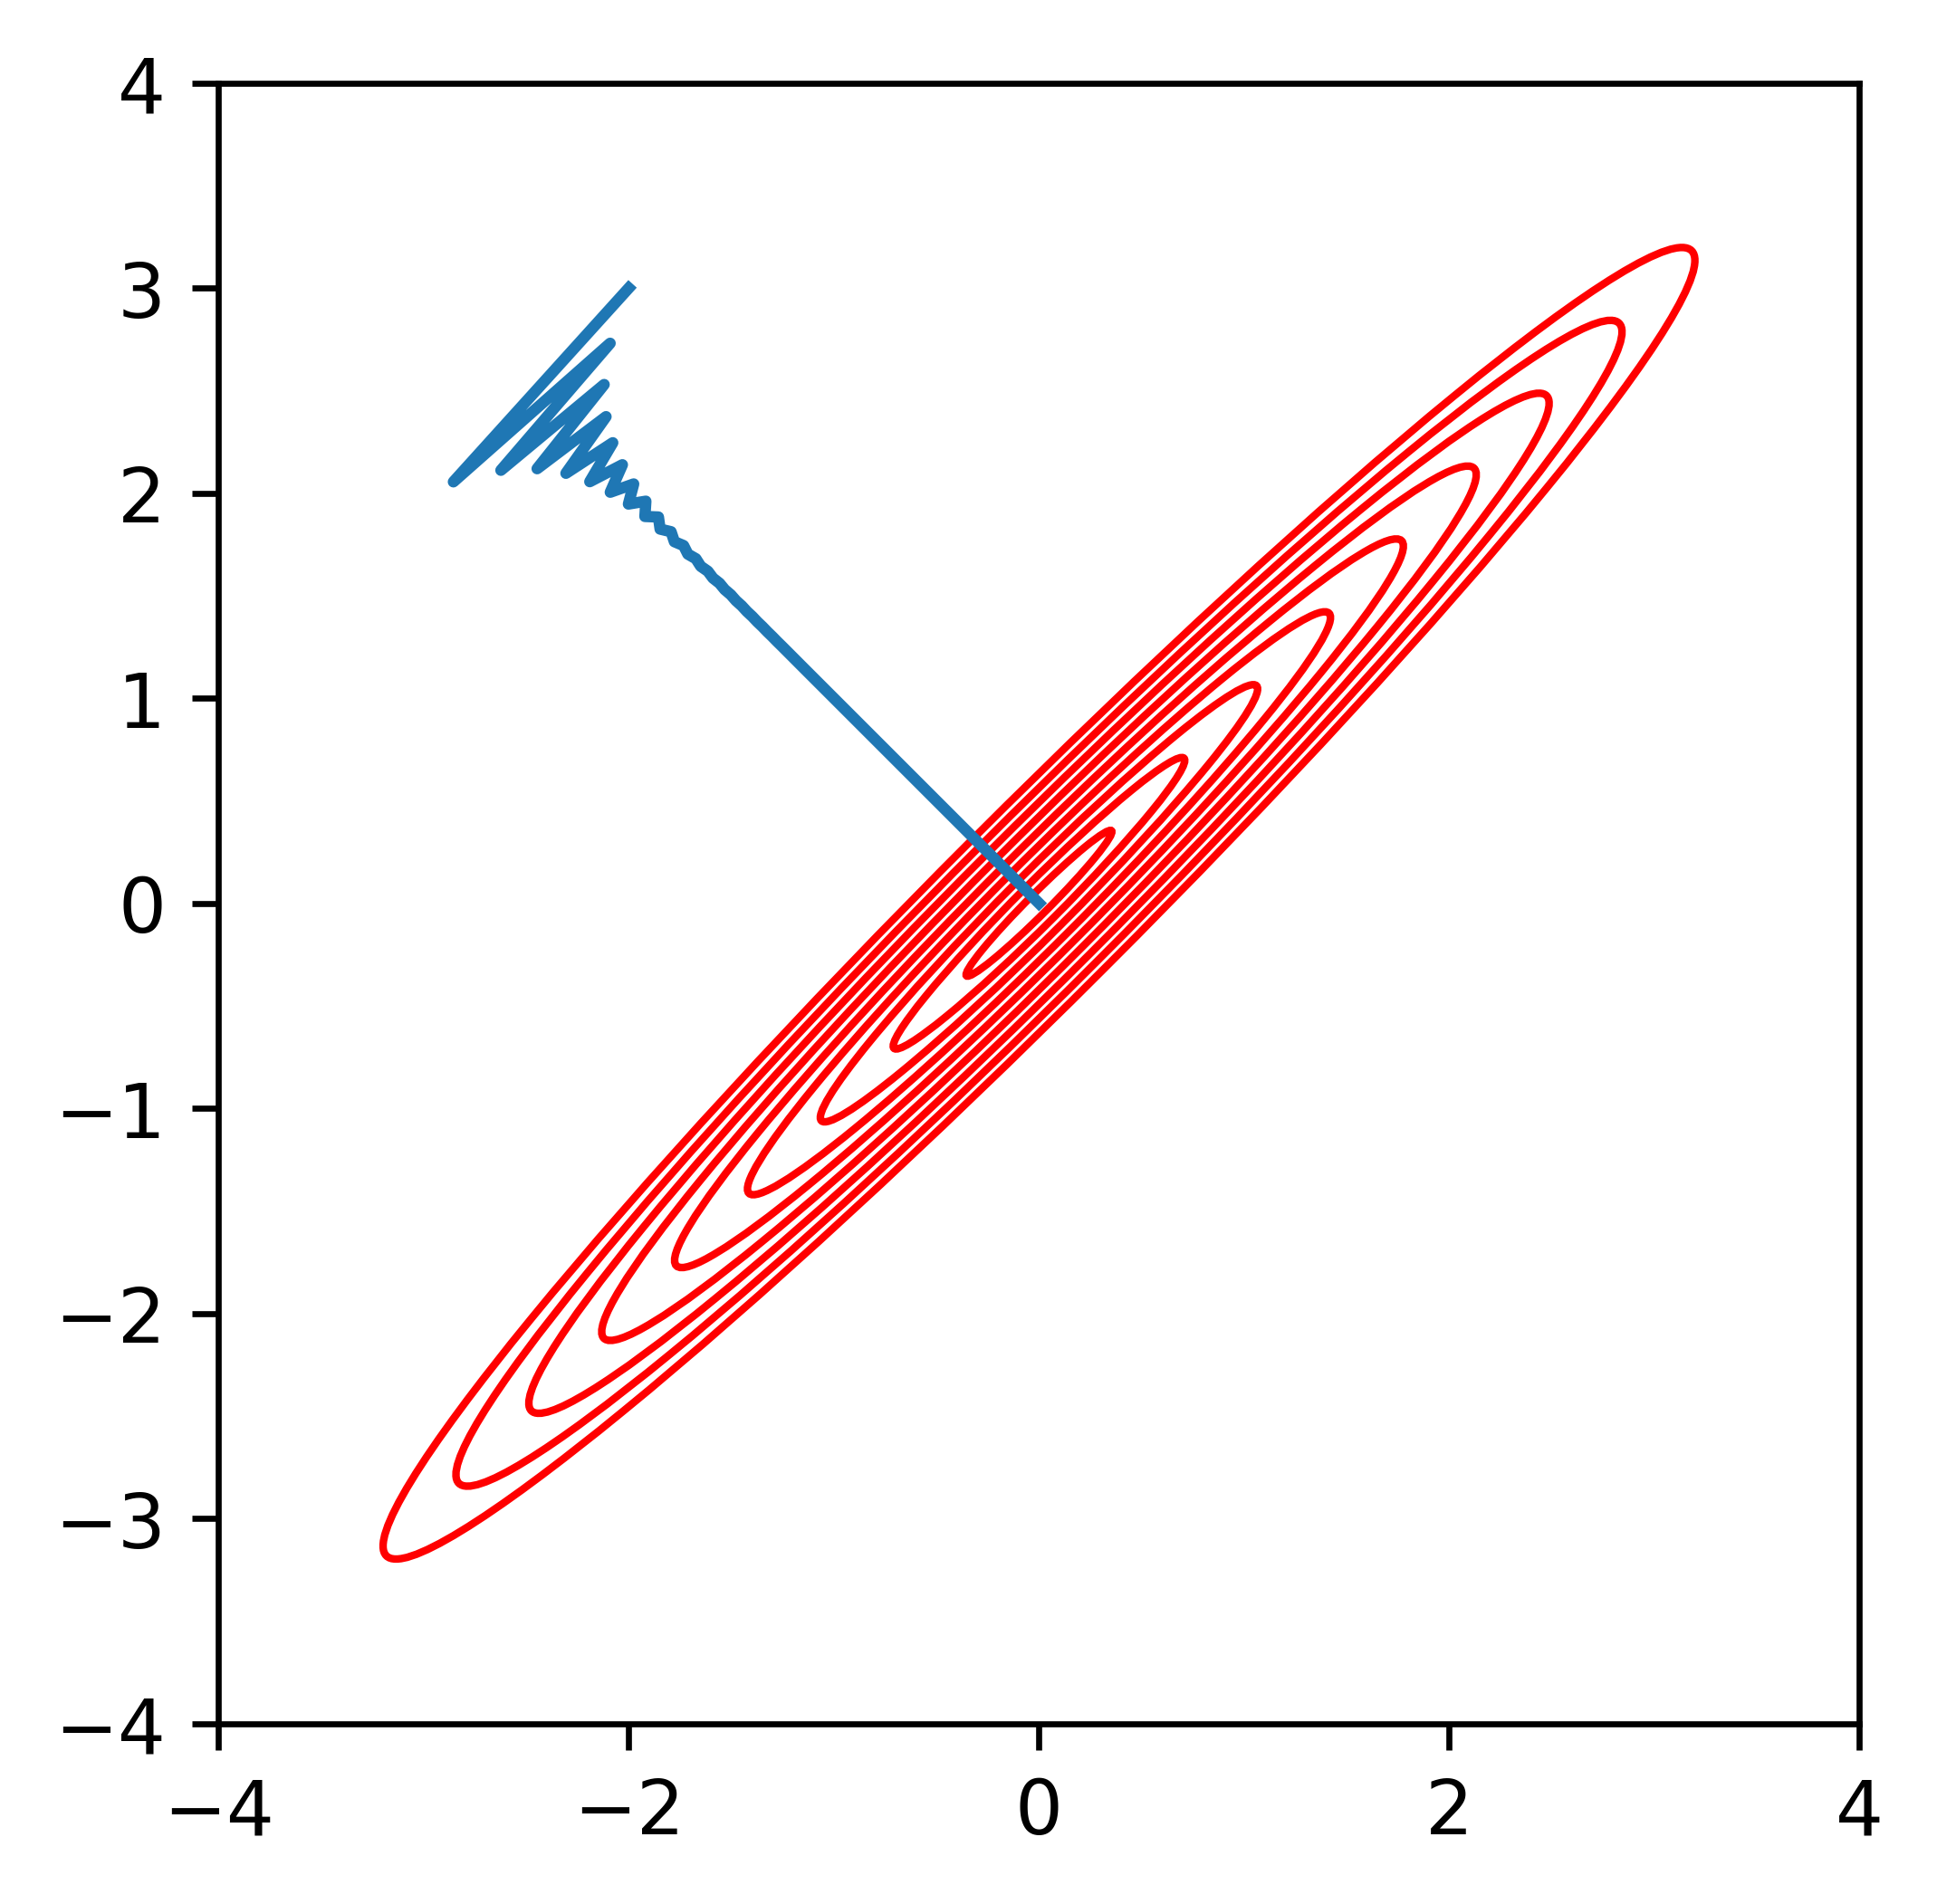

-3.290912292141383e-08
3.290912292141383e-08


In [15]:
experiment(a=1, b=1/10, T=1000, learning_rate_ratio = 0.9)